In [21]:
import matplotlib, matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score

from matplotlib import font_manager,rc
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [22]:
card = pd.read_csv("소비유형별_개인_신용카드.csv",thousands = ',')
card.columns = card.columns.str.replace(' ','_')

In [23]:
card.rename(columns={'Unnamed:_0':'연도'},inplace=True)

In [24]:
columns= ['대형마트/유통전문점', '슈퍼마켓', '편의점', '면세점', '일반식료품', '여행사/자동차임대', '항공사',
       '대중교통', '숙박', '음식점']
# data = train[train.columns.difference(['Survived'])].to_numpy()

In [25]:
card

,연도,대형마트/유통전문점,슈퍼마켓,편의점,면세점,일반식료품,여행사/자동차임대,항공사,대중교통,숙박,음식점
0,Jan-18,84540000000,58535000000,18918000000,5449000000,20044000000,5131000000,16435000000,17958000000,8574000000,143548000000
1,Feb-18,93120000000,62688000000,18862000000,5068000000,26643000000,4629000000,14080000000,17724000000,7511000000,137602000000
2,Mar-18,83393000000,56556000000,19898000000,5098000000,18754000000,4160000000,14556000000,17241000000,6988000000,146200000000
3,Apr-18,86907000000,60043000000,20956000000,5458000000,20065000000,4318000000,14349000000,18918000000,7277000000,154796000000
4,May-18,89287000000,61623000000,22217000000,5804000000,20991000000,4747000000,14343000000,18275000000,8504000000,162070000000
5,Jun-18,86394000000,63380000000,23653000000,5468000000,20085000000,4578000000,14589000000,18986000000,7774000000,157166000000
6,Jul-18,93022000000,64659000000,23896000000,5301000000,19304000000,5480000000,14956000000,18200000000,8523000000,163279000000
7,Aug-18,88360000000,64455000000,24330000000,5387000000,20481000000,4420000000,13024000000,19205000000,11090000000,165754000000
8,Sep-18,99165000000,69778000000,23910000000,5359000000,30657000000,4734000000,10749000000,18673000000,7810000000,155901000000
9,Oct-18,85960000000,60546000000,23479000000,5398000000,20944000000,4020000000,13370000000,18969000000,8298000000,156452000000


In [26]:
cc = card[columns]

In [27]:
cc

,대형마트/유통전문점,슈퍼마켓,편의점,면세점,일반식료품,여행사/자동차임대,항공사,대중교통,숙박,음식점
0,84540000000,58535000000,18918000000,5449000000,20044000000,5131000000,16435000000,17958000000,8574000000,143548000000
1,93120000000,62688000000,18862000000,5068000000,26643000000,4629000000,14080000000,17724000000,7511000000,137602000000
2,83393000000,56556000000,19898000000,5098000000,18754000000,4160000000,14556000000,17241000000,6988000000,146200000000
3,86907000000,60043000000,20956000000,5458000000,20065000000,4318000000,14349000000,18918000000,7277000000,154796000000
4,89287000000,61623000000,22217000000,5804000000,20991000000,4747000000,14343000000,18275000000,8504000000,162070000000
5,86394000000,63380000000,23653000000,5468000000,20085000000,4578000000,14589000000,18986000000,7774000000,157166000000
6,93022000000,64659000000,23896000000,5301000000,19304000000,5480000000,14956000000,18200000000,8523000000,163279000000
7,88360000000,64455000000,24330000000,5387000000,20481000000,4420000000,13024000000,19205000000,11090000000,165754000000
8,99165000000,69778000000,23910000000,5359000000,30657000000,4734000000,10749000000,18673000000,7810000000,155901000000
9,85960000000,60546000000,23479000000,5398000000,20944000000,4020000000,13370000000,18969000000,8298000000,156452000000


In [28]:
#표준화
sc = StandardScaler()
cc_scaled = sc.fit_transform(cc)
cc_dataFrame=pd.DataFrame(cc_scaled) #mean~min, mem_period 5개 변수가 표준화됨.
cc_dataFrame

,0,1,2,3,4,5,6,7,8,9
0,-1.546187,-0.326233,-1.848404,1.008463,-1.243162,1.600433,1.434999,0.236088,0.268250,-0.444866
1,-0.136501,0.905019,-1.861978,0.824584,0.143127,1.277212,1.027452,0.144143,-0.331978,-0.738419
2,-1.734638,-0.912953,-1.610861,0.839062,-1.514159,0.975238,1.109827,-0.045640,-0.627293,-0.313937
3,-1.157291,0.120848,-1.354412,1.012806,-1.238750,1.076969,1.074004,0.613297,-0.464108,0.110445
4,-0.766260,0.589276,-1.048757,1.179793,-1.044220,1.353188,1.072966,0.360646,0.228724,0.469561
5,-1.241577,1.110179,-0.700684,1.017632,-1.234549,1.244374,1.115538,0.640016,-0.183474,0.227452
6,-0.152603,1.489368,-0.641784,0.937035,-1.398618,1.825143,1.179049,0.331176,0.239453,0.529249
7,-0.918565,1.428887,-0.536586,0.978540,-1.151359,1.142643,0.844706,0.726067,1.688922,0.651439
8,0.856686,3.007012,-0.638390,0.965027,0.986370,1.344818,0.451004,0.517030,-0.163146,0.164999
9,-1.312883,0.269974,-0.742860,0.983849,-1.054094,0.885096,0.904583,0.633337,0.112405,0.192202


In [29]:
cc_dataFrame.columns

RangeIndex(start=0, stop=10, step=1)

In [30]:
max_score = 0
optimized_n = 0
columns=[0,1,2,3,4,5,6,7,8,9]
for k in range(2,20):
   
    km = KMeans(n_clusters=k,random_state=77).fit(cc_dataFrame[columns])
    # silhouette_score N개로 클러스터링했을 때 중심점을 기준으로 얼마나 잘 뭉쳐있는 정도를 나타내는 수치
    s_score = silhouette_score(cc_dataFrame[columns],km.labels_)
    if s_score > max_score:
        max_score = s_score
        optimized_n = k
    print("score for %d clusters:%.3f" % (k, s_score))
    
print(f'\n 최적의 클러스터개수: {optimized_n}, silhouette 점수: {max_score}')

score for 2 clusters:0.401
score for 3 clusters:0.434
score for 4 clusters:0.393
score for 5 clusters:0.318
score for 6 clusters:0.383
score for 7 clusters:0.378
score for 8 clusters:0.338
score for 9 clusters:0.349
score for 10 clusters:0.266
score for 11 clusters:0.282
score for 12 clusters:0.275
score for 13 clusters:0.263
score for 14 clusters:0.240
score for 15 clusters:0.258
score for 16 clusters:0.241
score for 17 clusters:0.265
score for 18 clusters:0.241
score for 19 clusters:0.279

 최적의 클러스터개수: 3, silhouette 점수: 0.4343730877632657


In [31]:
#cc_scaled 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit(cc_scaled)

#클러스터링 변수인 clusters 값을 원본 데이터인 'cc'내에 넣기 
cc['cluster'] = clusters.labels_
cc.head()

,대형마트/유통전문점,슈퍼마켓,편의점,면세점,일반식료품,여행사/자동차임대,항공사,대중교통,숙박,음식점,cluster
0,84540000000,58535000000,18918000000,5449000000,20044000000,5131000000,16435000000,17958000000,8574000000,143548000000,1
1,93120000000,62688000000,18862000000,5068000000,26643000000,4629000000,14080000000,17724000000,7511000000,137602000000,1
2,83393000000,56556000000,19898000000,5098000000,18754000000,4160000000,14556000000,17241000000,6988000000,146200000000,1
3,86907000000,60043000000,20956000000,5458000000,20065000000,4318000000,14349000000,18918000000,7277000000,154796000000,1
4,89287000000,61623000000,22217000000,5804000000,20991000000,4747000000,14343000000,18275000000,8504000000,162070000000,1


In [32]:
#cluster를 기준으로 데이터 개수 세기
cc.groupby('cluster').count()

,대형마트/유통전문점,슈퍼마켓,편의점,면세점,일반식료품,여행사/자동차임대,항공사,대중교통,숙박,음식점
cluster,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
1,25,25,25,25,25,25,25,25,25,25
2,8,8,8,8,8,8,8,8,8,8


In [33]:
#그룹별 특징을 알아보자! -그룹별 평균값
cc.groupby('cluster').mean()

,대형마트/유통전문점,슈퍼마켓,편의점,면세점,일반식료품,여행사/자동차임대,항공사,대중교통,숙박,음식점
cluster,,,,,,,,,,
0,9.514788e+10,5.852184e+10,2.756508e+10,1.413640e+09,2.754048e+10,1.183680e+09,2.020560e+09,1.483732e+10,7.015360e+09,1.361631e+11
1,9.048188e+10,6.022320e+10,2.323808e+10,5.665720e+09,2.279936e+10,4.365840e+09,1.396172e+10,1.914204e+10,8.466120e+09,1.593051e+11
2,1.010504e+11,6.127825e+10,3.368212e+10,2.233000e+09,3.091025e+10,1.836500e+09,9.091250e+09,1.965388e+10,1.033762e+10,1.827140e+11


In [34]:
from sklearn.decomposition import PCA
X = cc_scaled.copy()

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-2.8379664 , -2.09313278],
       [-1.62412094, -1.2089616 ],
       [-2.10590755, -2.63942119],
       [-2.42995663, -1.60249054],
       [-2.60455588, -0.80921564],
       [-2.57414264, -1.01917515],
       [-2.70320009, -0.33464027],
       [-2.82985341,  0.28361652],
       [-1.3340143 ,  0.89640837],
       [-2.27079658, -1.00314104],
       [-2.21444322, -1.08213572],
       [-2.61050918, -0.50104983],
       [-3.01207644, -0.82882105],
       [-2.28582893, -1.06611597],
       [-2.25920548, -1.60601341],
       [-2.76942416, -0.8645921 ],
       [-2.60297407, -0.02283195],
       [-2.28818655, -0.14423674],
       [-2.87232501, -0.00493974],
       [-2.74255757,  1.1841856 ],
       [-0.99544703,  0.80214053],
       [-1.89372194, -0.10584824],
       [-1.887363  ,  0.14906506],
       [-2.3675084 ,  0.67807898],
       [-1.24503662,  0.89515389],
       [ 1.10528223, -2.50876099],
       [ 3.39165204, -3.32926152],
       [ 2.75641614, -2.59024423],
       [ 2.21794395,

In [35]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = cc['cluster'] 
pca_df.head()

,0,1,cluster
0,-2.837966,-2.093133,1
1,-1.624121,-1.208962,1
2,-2.105908,-2.639421,1
3,-2.429957,-1.602491,1
4,-2.604556,-0.809216,1


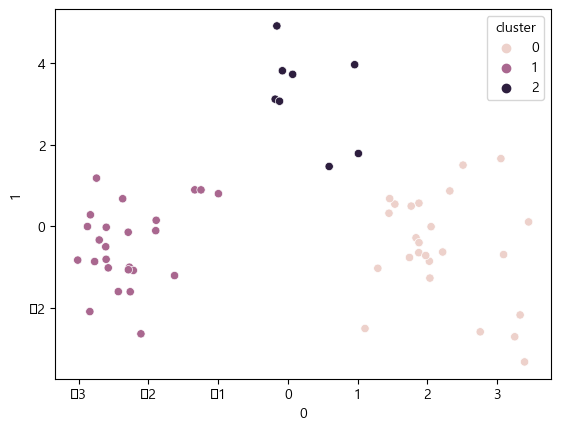

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue='cluster', data=pca_df)

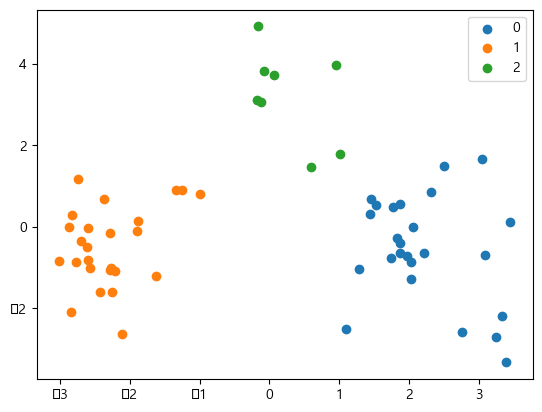

In [37]:
for i in sorted(pca_df['cluster'].unique()):
    tmp = pca_df.loc[pca_df['cluster'] == i] #해당하는 클러스터 번호일 때 그림을 그리고, for문 실행하며 위에 덧그림 
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_df['cluster'].unique()))

In [38]:
cc_join= pd.concat([card, cc], axis=1)
cc_join.head()

,연도,대형마트/유통전문점,슈퍼마켓,편의점,면세점,일반식료품,여행사/자동차임대,항공사,대중교통,숙박,...,슈퍼마켓,편의점,면세점,일반식료품,여행사/자동차임대,항공사,대중교통,숙박,음식점,cluster
0,Jan-18,84540000000,58535000000,18918000000,5449000000,20044000000,5131000000,16435000000,17958000000,8574000000,...,58535000000,18918000000,5449000000,20044000000,5131000000,16435000000,17958000000,8574000000,143548000000,1
1,Feb-18,93120000000,62688000000,18862000000,5068000000,26643000000,4629000000,14080000000,17724000000,7511000000,...,62688000000,18862000000,5068000000,26643000000,4629000000,14080000000,17724000000,7511000000,137602000000,1
2,Mar-18,83393000000,56556000000,19898000000,5098000000,18754000000,4160000000,14556000000,17241000000,6988000000,...,56556000000,19898000000,5098000000,18754000000,4160000000,14556000000,17241000000,6988000000,146200000000,1
3,Apr-18,86907000000,60043000000,20956000000,5458000000,20065000000,4318000000,14349000000,18918000000,7277000000,...,60043000000,20956000000,5458000000,20065000000,4318000000,14349000000,18918000000,7277000000,154796000000,1
4,May-18,89287000000,61623000000,22217000000,5804000000,20991000000,4747000000,14343000000,18275000000,8504000000,...,61623000000,22217000000,5804000000,20991000000,4747000000,14343000000,18275000000,8504000000,162070000000,1


In [39]:
newdf = cc_join.groupby(['cluster','연도'], as_index=False).count()[['cluster', '연도']]
newdf

,cluster,연도
0,0,Apr-20
1,0,Apr-21
2,0,Aug-20
3,0,Aug-21
4,0,Dec-20
5,0,Dec-21
6,0,Feb-20
7,0,Feb-21
8,0,Feb-22
9,0,Jan-21


In [40]:
newdf.head(10)

,cluster,연도
0,0,Apr-20
1,0,Apr-21
2,0,Aug-20
3,0,Aug-21
4,0,Dec-20
5,0,Dec-21
6,0,Feb-20
7,0,Feb-21
8,0,Feb-22
9,0,Jan-21


In [41]:
newdf.tail(10)

,cluster,연도
48,1,Sep-18
49,1,Sep-19
50,2,Apr-22
51,2,Aug-22
52,2,Jul-22
53,2,Jun-22
54,2,May-22
55,2,Nov-21
56,2,Oct-22
57,2,Sep-22


In [45]:
import dataframe_image as dfi
dfi.export(newdf,'코로나19사태 여행관련업 소비데이터프레임.png',max_cols=-1,max_rows=-1)